In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
    
import re
import collections
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaeyoungkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaeyoungkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaeyoungkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
labels  = pd.read_csv("../data/ps5_tweets_labels.csv")
number_labels  = pd.read_csv("../data/ps5_tweets_labels_as_numbers.csv")
text  = pd.read_csv("../data/ps5_tweets_text.csv")

# Preprocessing

In [3]:
text = text.merge(number_labels, left_on = "Id", right_on = "Id")

In [4]:
text

,Id,Tweet,Label
0,0,https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...,4
1,1,@mygovindia Today just after a week of lockdow...,1
2,2,Tuskys partners with Amref to provide on groun...,2
3,3,@chrissyteigen are u doing ur own grocery shop...,1
4,4,UK Critical Care Nurse Cries at Empty SuperMar...,0
...,...,...,...
37036,37036,Minnesota classifies grocery store workers as ...,1
37037,37037,US Senator @ewarren has asked for information ...,1
37038,37038,Just commented on @thejournal_ie: Poll: Are yo...,0
37039,37039,My wife got laid off yesterday because the sma...,2


In [5]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)
nltk.download('stopwords')
stopwords_english = stopwords.words('english')
punctuations = string.punctuation
stemmer = PorterStemmer()

def text_normalizer(text):
    
    ## remove special characters
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'#', '', text)
    
    
    ## remove stopwords and punctuations
    text = tokenizer.tokenize(text)
    res = []
    for word in text:
        if word not in stopwords_english and word not in punctuations:
            res.append(word)
    
    stem_res = []
    ## stemming
    for word in res:
        stem = stemmer.stem(word)
        stem_res.append(stem)
        
        
    return stem_res

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaeyoungkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print("Original Text : ", text.iloc[5300]["Tweet"])
print("###################################")
print("Normalized Text : ", text_normalizer(text.iloc[5300]["Tweet"]))



#GikombaCorona
###################################
Normalized Text :  ['alert', 'largest', 'wholesal', 'retail', 'ongata', 'rongai', 'kware', 'open', 'air', 'market', 'face', 'immin', 'closur', 'day', 'mid', 'combat', 'covid', '19', 'spread', 'move', 'leav', 'consum', 'merci', 'local', 'retail', 'enjoy', 'freedom', 'set', 'price', 'lookout', 'gikombacorona']


In [8]:
text["Tweet_token"] = text["Tweet"].apply(lambda x :  text_normalizer(x))

In [9]:
text

,Id,Tweet,Label,Tweet_token
0,0,https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...,4,"[gaisss, pleas, read, pleas, limit, go, outsid..."
1,1,@mygovindia Today just after a week of lockdow...,1,"[today, week, lockdown, lot, confectionari, st..."
2,2,Tuskys partners with Amref to provide on groun...,2,"[tuski, partner, amref, provid, ground, health..."
3,3,@chrissyteigen are u doing ur own grocery shop...,1,"[u, ur, groceri, shop, like, regular, person, ..."
4,4,UK Critical Care Nurse Cries at Empty SuperMar...,0,"[uk, critic, care, nurs, cri, empti, supermark..."
...,...,...,...,...
37036,37036,Minnesota classifies grocery store workers as ...,1,"[minnesota, classifi, groceri, store, worker, ..."
37037,37037,US Senator @ewarren has asked for information ...,1,"[us, senat, ask, inform, leveragedloan, price,..."
37038,37038,Just commented on @thejournal_ie: Poll: Are yo...,0,"[comment, poll, onlin, shop, normal, covid, 19..."
37039,37039,My wife got laid off yesterday because the sma...,2,"[wife, got, laid, yesterday, small, retail, st..."


In [10]:
X = text["Tweet_token"]
y = text["Label"]

In [11]:
## train test split
## 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=200)

In [12]:
X_train

10813    [probabl, first, time, ever, post, breitbart, ...
4169     [thing, keep, coronaviru, end, 1, polish, deli...
35718    [pop, store, give, mother, corona, viru, mothe...
19214    [updat, start, today', midnight, end, april, 2...
18482    [need, immedi, work, think, one, 1st, thing, i...
                               ...                        
30939    [son, niec, lost, job, pizza, hut, drive, thru...
11343    [local, supermarket, pre-open, hour, exclus, n...
784      [usd, cad, climb, back, multi-year, top, aroun...
12905    [covid, 19, put, indian, economi, ventil, gove...
1818     [attent, californian, socal, supermarket, info...
Name: Tweet_token, Length: 29632, dtype: object

# Create (word, label) dictionary

In [101]:
def frequency_dict(X_train, y_train):
    freq_dict = {}
    
    for text, y in zip(X_train, y_train):
        for word in text:
            ## pair : (bad, 0), (good, 4), ...
            pair = (word, y)
            
            freq_dict[pair] = freq_dict.get(pair, 0) + 1
    return freq_dict

In [102]:
# X_train_dummy = X_train[:1000]
# y_train_dummy = y_train[:1000]

In [103]:
freq = frequency_dict(X_train, y_train)
freq

{('probabl', 3): 33,
 ('first', 3): 189,
 ('time', 3): 641,
 ('ever', 3): 70,
 ('post', 3): 105,
 ('breitbart', 3): 1,
 ('articl', 3): 73,
 ("i'm", 3): 121,
 ('agreement', 3): 8,
 ('spot', 3): 37,
 ('insidertraitor', 3): 1,
 ('fridaythought', 3): 5,
 ('coronavirusupd', 3): 39,
 ('covid', 3): 4452,
 ('_19', 3): 580,
 ('thing', 3): 222,
 ('keep', 3): 378,
 ('coronaviru', 3): 3246,
 ('end', 3): 91,
 ('1', 3): 201,
 ('polish', 3): 3,
 ('deli', 3): 4,
 ('life', 3): 114,
 ('meat', 3): 50,
 ('delici', 3): 4,
 ('coffe', 3): 17,
 ('cheap', 3): 26,
 ('tasti', 3): 2,
 ('wast', 3): 23,
 ('much', 3): 176,
 ('shop', 3): 1087,
 ('supermarket', 3): 1517,
 ('pop', 2): 6,
 ('store', 2): 1153,
 ('give', 2): 53,
 ('mother', 2): 15,
 ('corona', 2): 126,
 ('viru', 2): 115,
 ('day', 2): 236,
 ('lt', 2): 1,
 ('3', 2): 86,
 ('updat', 0): 40,
 ('start', 0): 106,
 ("today'", 0): 3,
 ('midnight', 0): 7,
 ('end', 0): 72,
 ('april', 0): 21,
 ('2020', 0): 57,
 ('emerg', 0): 106,
 ('decre', 0): 1,
 ('enforc', 0): 16,

# Train Naive Bayes

In [104]:
N_label_tweet = y_train.value_counts().to_dict()
N_label_tweet

{3: 8182, 1: 7123, 2: 5548, 4: 4817, 0: 3962}

In [105]:
def Naive_Bayes_Train(freq, X_train, y_train, N_label_tweet):
    '''
    Input : word frequency, train data, number of tweets for each class
    Output : logprior, loglikelihood
    '''
    
    loglikelihood = {}
    logprior = 0
    
    ## # of unique words
    unique_words = set([pair[0] for pair in freq.keys()])
    V = len(unique_words)
    
    ## the number of pairs for each label
    N_label = {}
    for pair in freq.keys():
        for i in [0,1,2,3,4]:
            if pair[1] == i:
                N_label[i] = N_label.get(i, 0) + freq[pair]
#     print(N_label)
                
    ## tot num of tweet
    N_tweet = len(y_train)
#     print(N_tweet)
#     print(np.log(N_label_tweet[0]) - np.log(N_tweet - N_label_tweet[0]))
    
    ## logprior
    logprior = [np.log(N_label_tweet[0]) - np.log(N_tweet - N_label_tweet[0]),
               np.log(N_label_tweet[1]) - np.log(N_tweet - N_label_tweet[1]),
               np.log(N_label_tweet[2]) - np.log(N_tweet - N_label_tweet[2]),
               np.log(N_label_tweet[3]) - np.log(N_tweet - N_label_tweet[3]),
               np.log(N_label_tweet[4]) - np.log(N_tweet - N_label_tweet[4])]
    
    
    for word in unique_words:
        
        ## frequency of the word
        freq_0 = freq.get((word, 0), 0)
        freq_1 = freq.get((word, 1), 0)
        freq_2 = freq.get((word, 2), 0)
        freq_3 = freq.get((word, 3), 0)
        freq_4 = freq.get((word, 4), 0)
        
#         print(freq_0)
#         print(freq_1)
#         print(freq_2)
#         print(freq_3)
#         print(freq_4)
        
        
        ## probability of the word is in each class
        p_w_0 = (freq_0 + 1) / (N_label[0] + V)
        p_w_1 = (freq_1 + 1) / (N_label[1] + V)
        p_w_2 = (freq_2 + 1) / (N_label[2] + V)
        p_w_3 = (freq_3 + 1) / (N_label[3] + V)
        p_w_4 = (freq_4 + 1) / (N_label[4] + V)
        
        p_w_not_0 = (freq_1+freq_2+freq_3+freq_4+1) / (N_label[1]+N_label[2]+N_label[3]+N_label[4]+V)
        p_w_not_1 = (freq_0+freq_2+freq_3+freq_4+1) / (N_label[0]+N_label[2]+N_label[3]+N_label[4]+V)
        p_w_not_2 = (freq_0+freq_1+freq_3+freq_4+1) / (N_label[0]+N_label[1]+N_label[3]+N_label[4]+V)
        p_w_not_3 = (freq_0+freq_1+freq_2+freq_4+1) / (N_label[0]+N_label[1]+N_label[2]+N_label[4]+V)
        p_w_not_4 = (freq_0+freq_1+freq_2+freq_3+1) / (N_label[0]+N_label[1]+N_label[2]+N_label[3]+V)
        
        
#         print(p_w_0)
#         print(p_w_1)
#         print(p_w_2)
#         print(p_w_3)
#         print(p_w_4)
 
        
        ## log likelihood of the word
        loglikelihood[word] = [np.log(p_w_0 / p_w_not_0),
                               np.log(p_w_1 / p_w_not_1),
                               np.log(p_w_2 / p_w_not_2),
                              np.log(p_w_3 / p_w_not_3),
                              np.log(p_w_4 / p_w_not_4)]
        
    return logprior, loglikelihood

                               
## https://www.youtube.com/watch?v=OsSkjrNjqNI

In [106]:
logprior, loglikelihood = Naive_Bayes_Train(freq, X_train, y_train, N_label_tweet)


# Prediction

In [107]:
def prediction(tweet, logprior, loglikelihood):
    p = {}
    for i in [0,1,2,3,4]:
        p[i] = logprior[i]
    
    for word in tweet:
        if word in loglikelihood:
            for i in [0,1,2,3,4]:
                p[i] += loglikelihood[word][i]
    
    return max(p, key=p.get)

In [108]:
y_pred = X_test.map(lambda x : prediction(x, logprior, loglikelihood))

In [109]:
accuracy_score(y_test, y_pred)

0.4629504656498853

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 419,  414,   29,  107,   15],
       [ 225,  846,  100,  562,   74],
       [  30,  327,  454,  518,   53],
       [  65,  413,  123, 1170,  329],
       [   5,   79,   18,  493,  541]])

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.43      0.48       984
           1       0.41      0.47      0.44      1807
           2       0.63      0.33      0.43      1382
           3       0.41      0.56      0.47      2100
           4       0.53      0.48      0.50      1136

    accuracy                           0.46      7409
   macro avg       0.51      0.45      0.47      7409
weighted avg       0.49      0.46      0.46      7409



[Text(33.0, 0.5, 'y_ture'), Text(0.5, 15.0, 'y_pred')]

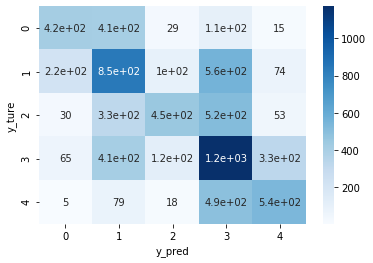

In [113]:
fig = sns.heatmap(cm, cmap = 'Blues', annot=True)
fig.set(xlabel='y_pred', ylabel='y_ture')

## Cross Validation

In [118]:


kf = KFold(n_splits=10, shuffle = True)
kf.get_n_splits(X)


accuracy = []
f1score = []
precision = []
recall = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    freq = frequency_dict(X_train, y_train)
    N_label_tweet = y_train.value_counts().to_dict()
    logprior, loglikelihood = Naive_Bayes_Train(freq, X_train, y_train, N_label_tweet)
    y_pred = X_test.map(lambda x : prediction(x, logprior, loglikelihood))
    accuracy.append(accuracy_score(y_test, y_pred))
    f1score.append(f1_score(y_test, y_pred, average='macro'))
    precision.append(precision_score(y_test, y_pred, average='macro'))
    recall.append(recall_score(y_test, y_pred, average='macro'))
    
    
    


TRAIN: [    0     1     2 ... 37038 37039 37040] TEST: [    3     8    29 ... 36990 37009 37016]
TRAIN: [    0     1     2 ... 37037 37038 37039] TEST: [   14    21    31 ... 37019 37021 37040]
TRAIN: [    0     1     2 ... 37037 37038 37040] TEST: [   10    11    22 ... 37032 37033 37039]
TRAIN: [    1     2     3 ... 37038 37039 37040] TEST: [    0    15    17 ... 37027 37028 37035]
TRAIN: [    0     1     2 ... 37038 37039 37040] TEST: [    4     5     6 ... 37008 37020 37037]
TRAIN: [    0     1     2 ... 37038 37039 37040] TEST: [   25    38    48 ... 37017 37018 37023]
TRAIN: [    0     1     2 ... 37038 37039 37040] TEST: [   30    56    61 ... 36998 37010 37030]
TRAIN: [    0     2     3 ... 37038 37039 37040] TEST: [    1    12    46 ... 37022 37026 37036]
TRAIN: [    0     1     3 ... 37037 37039 37040] TEST: [    2    16    18 ... 37029 37034 37038]
TRAIN: [    0     1     2 ... 37038 37039 37040] TEST: [   13    23    28 ... 37003 37015 37024]


In [120]:
## average score of 10-fold cross validation
print("Accuracy : ",sum(accuracy)/10)
print("Precision : ",sum(precision)/10)
print("Recall : ",sum(recall)/10)
print("F1 score : ",sum(f1score)/10)


Accuracy :  0.47428504181203957
Precision :  0.5245030612317376
Recall :  0.4621541239653066
F1 score :  0.4783557359786368


# word2vec approach

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

import tensorflow_hub as hub
import numpy as np

### Load pretrained model

In [209]:
import tensorflow_hub as hub
# embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")
embed = hub.load("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1")

In [210]:
text

,Id,Tweet,Label,Tweet_token,tweet
0,0,https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...,4,"[gaisss, pleas, read, pleas, limit, go, outsid...",gaisss pleas read pleas limit go outsid pleas ...
1,1,@mygovindia Today just after a week of lockdow...,1,"[today, week, lockdown, lot, confectionari, st...",today week lockdown lot confectionari store ru...
2,2,Tuskys partners with Amref to provide on groun...,2,"[tuski, partner, amref, provid, ground, health...",tuski partner amref provid ground health educ ...
3,3,@chrissyteigen are u doing ur own grocery shop...,1,"[u, ur, groceri, shop, like, regular, person, ...",u ur groceri shop like regular person u still ...
4,4,UK Critical Care Nurse Cries at Empty SuperMar...,0,"[uk, critic, care, nurs, cri, empti, supermark...",uk critic care nurs cri empti supermarket shel...
...,...,...,...,...,...
37036,37036,Minnesota classifies grocery store workers as ...,1,"[minnesota, classifi, groceri, store, worker, ...",minnesota classifi groceri store worker emerg ...
37037,37037,US Senator @ewarren has asked for information ...,1,"[us, senat, ask, inform, leveragedloan, price,...",us senat ask inform leveragedloan price debt f...
37038,37038,Just commented on @thejournal_ie: Poll: Are yo...,0,"[comment, poll, onlin, shop, normal, covid, 19...",comment poll onlin shop normal covid 19 crisi
37039,37039,My wife got laid off yesterday because the sma...,2,"[wife, got, laid, yesterday, small, retail, st...",wife got laid yesterday small retail store wor...


In [218]:
def f(x):
    res = ""
    for word in x:
        res+=word
        res+=" "
    return res
X = X.map(lambda x : f(x))

def get_max_length(text):
    """
    get max token counts
    """
    max_length = 0
    for row in text['tweet']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

def get_word2vec_enc(tweets):
    """
    get word2vec value
    """
    encoded_tweets = []
    for tweet in tweets:
#         tokens = tweet.split(" ")
        word2vec_embedding = embed(tweet)
        encoded_tweets.append(word2vec_embedding)
    return encoded_tweets
        
def get_padded_encoded_tweets(encoded_tweets):
    """
    zero padding
    """
    padded_tweets_encoding = []
    for enc_tweet in encoded_tweets:
        zero_padding_cnt = max_length - enc_tweet.shape[0]
        pad = np.zeros((1, 128))
        for i in range(zero_padding_cnt):
            enc_tweet = np.concatenate((pad, enc_tweet), axis=0)
        padded_tweets_encoding.append(enc_tweet)
    return padded_tweets_encoding

def label_encode(label):
    """
    one hot encoding
    """
    if label == 0:
        return [1,0,0,0,0]
    elif label == 1:
        return [0,1,0,0,0]
    elif label == 2:
        return [0,0,1,0,0]
    elif label == 3:
        return [0,0,0,1,0]
    elif label == 4:
        return [0,0,0,0,1]
    
def preprocess(text):
    """
    encode text value to numeric value
    """
    # encode words into word2vec
    tweets = text['Tweet_token'].tolist()
    
    encoded_tweets = get_word2vec_enc(tweets)
    padded_encoded_tweets = get_padded_encoded_tweets(encoded_tweets)
    # encoded label
    labels = text['Label'].tolist()
    encoded_label = [label_encode(label) for label in labels]
    X = np.array(padded_encoded_tweets)
    Y = np.array(encoded_label)
    return X, Y 

In [219]:
text

,Id,Tweet,Label,Tweet_token,tweet
0,0,https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...,4,"[gaisss, pleas, read, pleas, limit, go, outsid...",gaisss pleas read pleas limit go outsid pleas ...
1,1,@mygovindia Today just after a week of lockdow...,1,"[today, week, lockdown, lot, confectionari, st...",today week lockdown lot confectionari store ru...
2,2,Tuskys partners with Amref to provide on groun...,2,"[tuski, partner, amref, provid, ground, health...",tuski partner amref provid ground health educ ...
3,3,@chrissyteigen are u doing ur own grocery shop...,1,"[u, ur, groceri, shop, like, regular, person, ...",u ur groceri shop like regular person u still ...
4,4,UK Critical Care Nurse Cries at Empty SuperMar...,0,"[uk, critic, care, nurs, cri, empti, supermark...",uk critic care nurs cri empti supermarket shel...
...,...,...,...,...,...
37036,37036,Minnesota classifies grocery store workers as ...,1,"[minnesota, classifi, groceri, store, worker, ...",minnesota classifi groceri store worker emerg ...
37037,37037,US Senator @ewarren has asked for information ...,1,"[us, senat, ask, inform, leveragedloan, price,...",us senat ask inform leveragedloan price debt f...
37038,37038,Just commented on @thejournal_ie: Poll: Are yo...,0,"[comment, poll, onlin, shop, normal, covid, 19...",comment poll onlin shop normal covid 19 crisi
37039,37039,My wife got laid off yesterday because the sma...,2,"[wife, got, laid, yesterday, small, retail, st...",wife got laid yesterday small retail store wor...


In [220]:
text["tweet"] = text["Tweet_token"].apply(f)
max_length = get_max_length(text)
max_length

68

In [221]:
text

,Id,Tweet,Label,Tweet_token,tweet
0,0,https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...,4,"[gaisss, pleas, read, pleas, limit, go, outsid...",gaisss pleas read pleas limit go outsid pleas ...
1,1,@mygovindia Today just after a week of lockdow...,1,"[today, week, lockdown, lot, confectionari, st...",today week lockdown lot confectionari store ru...
2,2,Tuskys partners with Amref to provide on groun...,2,"[tuski, partner, amref, provid, ground, health...",tuski partner amref provid ground health educ ...
3,3,@chrissyteigen are u doing ur own grocery shop...,1,"[u, ur, groceri, shop, like, regular, person, ...",u ur groceri shop like regular person u still ...
4,4,UK Critical Care Nurse Cries at Empty SuperMar...,0,"[uk, critic, care, nurs, cri, empti, supermark...",uk critic care nurs cri empti supermarket shel...
...,...,...,...,...,...
37036,37036,Minnesota classifies grocery store workers as ...,1,"[minnesota, classifi, groceri, store, worker, ...",minnesota classifi groceri store worker emerg ...
37037,37037,US Senator @ewarren has asked for information ...,1,"[us, senat, ask, inform, leveragedloan, price,...",us senat ask inform leveragedloan price debt f...
37038,37038,Just commented on @thejournal_ie: Poll: Are yo...,0,"[comment, poll, onlin, shop, normal, covid, 19...",comment poll onlin shop normal covid 19 crisi
37039,37039,My wife got laid off yesterday because the sma...,2,"[wife, got, laid, yesterday, small, retail, st...",wife got laid yesterday small retail store wor...


In [222]:
test = text.sample(frac = 0.3, random_state =1)
train = text[~text.index.isin(list(test.index))]
val = test.sample(frac = 0.5, random_state = 1)
test = test[~test.index.isin(list(val.index))]


In [223]:
max_length = get_max_length(train)
max_length

68

In [224]:
train_X, train_Y = preprocess(train)
val_X, val_Y = preprocess(val)
test_X, test_Y = preprocess(test)

In [226]:
# LSTM model
model = Sequential()
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

In [227]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train

In [229]:
print('Train...')
model.fit(train_X, train_Y,epochs=40, verbose = 1, validation_data=(val_X, val_Y))

Train...
Epoch 1/40
811/811 [==============================] - 19s 21ms/step - loss: 1.4643 - accuracy: 0.3423 - val_loss: 1.2681 - val_accuracy: 0.4478
Epoch 2/40
811/811 [==============================] - 20s 25ms/step - loss: 1.2383 - accuracy: 0.4712 - val_loss: 1.2261 - val_accuracy: 0.4739
Epoch 3/40
811/811 [==============================] - 22s 27ms/step - loss: 1.1667 - accuracy: 0.5042 - val_loss: 1.1913 - val_accuracy: 0.4919
Epoch 4/40
811/811 [==============================] - 22s 27ms/step - loss: 1.1381 - accuracy: 0.5247 - val_loss: 1.1531 - val_accuracy: 0.5164
Epoch 5/40
811/811 [==============================] - 22s 27ms/step - loss: 1.1042 - accuracy: 0.5394 - val_loss: 1.1380 - val_accuracy: 0.5265
Epoch 6/40
811/811 [==============================] - 22s 28ms/step - loss: 1.0883 - accuracy: 0.5457 - val_loss: 1.1512 - val_accuracy: 0.5164
Epoch 7/40
811/811 [==============================] - 23s 28ms/step - loss: 1.0656 - accuracy: 0.5555 - val_loss: 1.1230 - val_

In [230]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 32)                20608     
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 20,773
Trainable params: 20,773
Non-trainable params: 0
_________________________________________________________________


In [242]:
model.save('model_LSTM')

INFO:tensorflow:Assets written to: model_LSTM/assets


INFO:tensorflow:Assets written to: model_LSTM/assets


### Measure Performance

In [232]:
score, acc = model.evaluate(test_X, test_Y, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

174/174 - 1s - loss: 1.1445 - accuracy: 0.5907
Test score: 1.1444698572158813
Test accuracy: 0.5907127261161804


### Prediction

In [233]:
pred_y = model.predict(test_X)

pred_y = [np.argmax(y) for y in pred_y]

test_y = [np.argmax(y) for y in test_Y]

In [234]:
accuracy =accuracy_score(test_y, pred_y)
f1score = f1_score(test_y, pred_y, average='macro')
precision = precision_score(test_y, pred_y, average='macro')
recall = recall_score(test_y, pred_y, average='macro')

In [235]:
## score of the model
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ", recall)
print("F1 score : ", f1score)

Accuracy :  0.5907127429805615
Precision :  0.616731057688326
Recall :  0.5938277854491208
F1 score :  0.6032540941733647


### Confusion Matrix and heat map

In [236]:
cm = confusion_matrix(test_y, pred_y)
cm

array([[436, 268,  13,  24,   5],
       [161, 807, 134, 224,  36],
       [ 18, 163, 666, 187,   9],
       [ 35, 307, 153, 842, 182],
       [  6,  45,  18, 286, 531]])

[Text(33.0, 0.5, 'y_ture'), Text(0.5, 15.0, 'y_pred')]

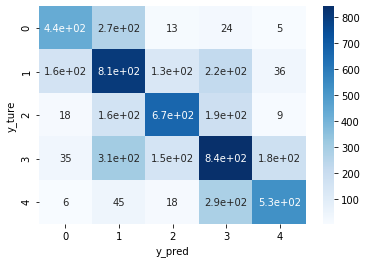

In [237]:
fig = sns.heatmap(cm, cmap = 'Blues', annot=True)
fig.set(xlabel='y_pred', ylabel='y_ture')

In [ ]:
#https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/10.Word2Vec_LSTM.ipynb#scrollTo=915WJfpKp9H_
